In [7]:
import sys
import os

sys.path.append(os.path.join(os.environ['BART_TOOLBOX_PATH'], 'python'))
import generate_maps
import generate_data
import generate_masks
from bart import bart

import matplotlib.pyplot as plt
import numpy as np
import h5py

In [25]:

test_data = h5py.File("../data/brain_multicoil_target/brain_data_60samples_test.h5", "r")
masks = h5py.File("../data/brain_multicoil_target/brain_kband1d_Rv4_Rb4_train.h5", "r")

In [30]:
for dataset_name in test_data:
        dataset = test_data[dataset_name]
        print(f"Values in test dataset {dataset_name}")

for dataset_name in masks:
        dataset = masks[dataset_name]
        print(f"Values in mask dataset {dataset_name}")

Values in test dataset imgs
Values in test dataset ksp
Values in test dataset maps
Values in mask dataset loss_masks
Values in mask dataset masks


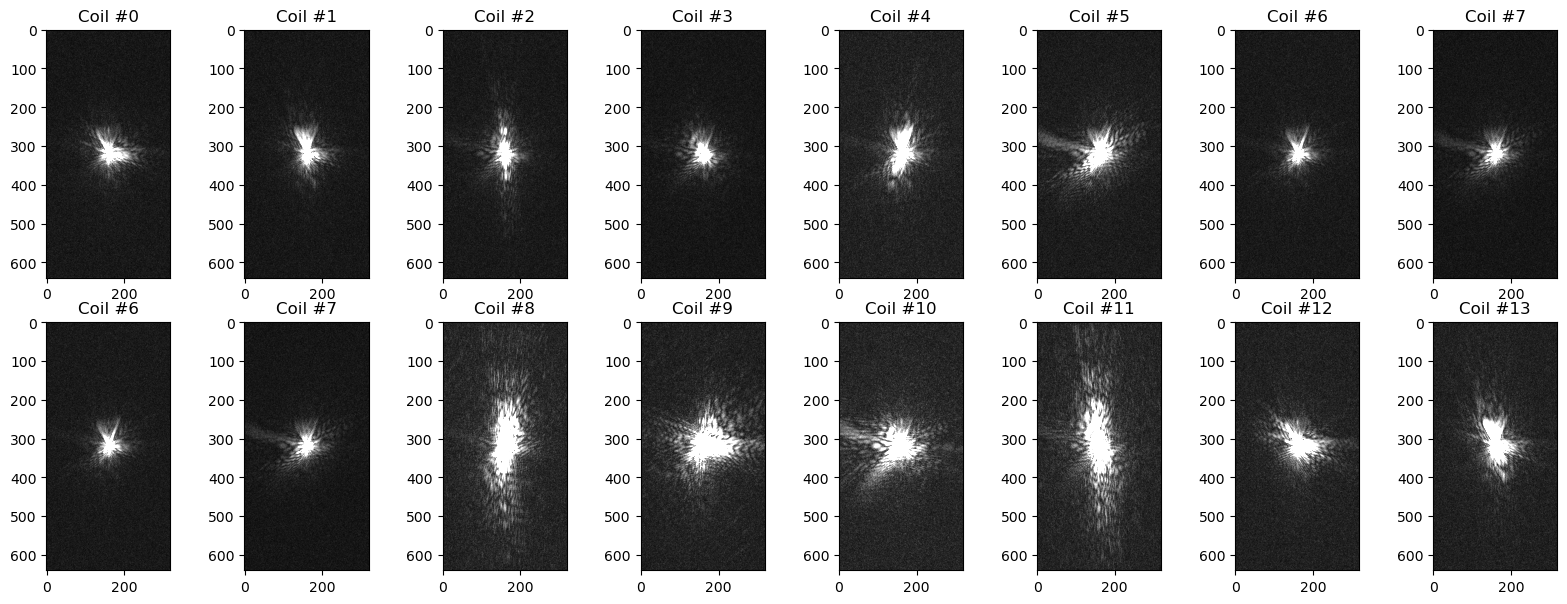

In [4]:
# visualize the ref scan coil images
fig, axes = plt.subplots(2, 8, figsize=(16, 6))
plt.tight_layout() # This automatically puts space between plots and make it tidy
for i in range(2):
    for ax, index in zip(axes[i], range(12)):
        ax.imshow(np.abs(test_data["ksp"][0][i*6+index][:]),cmap='gray', vmax=0.2)
        ax.set_title('Coil #{}'.format(i*6 + index))

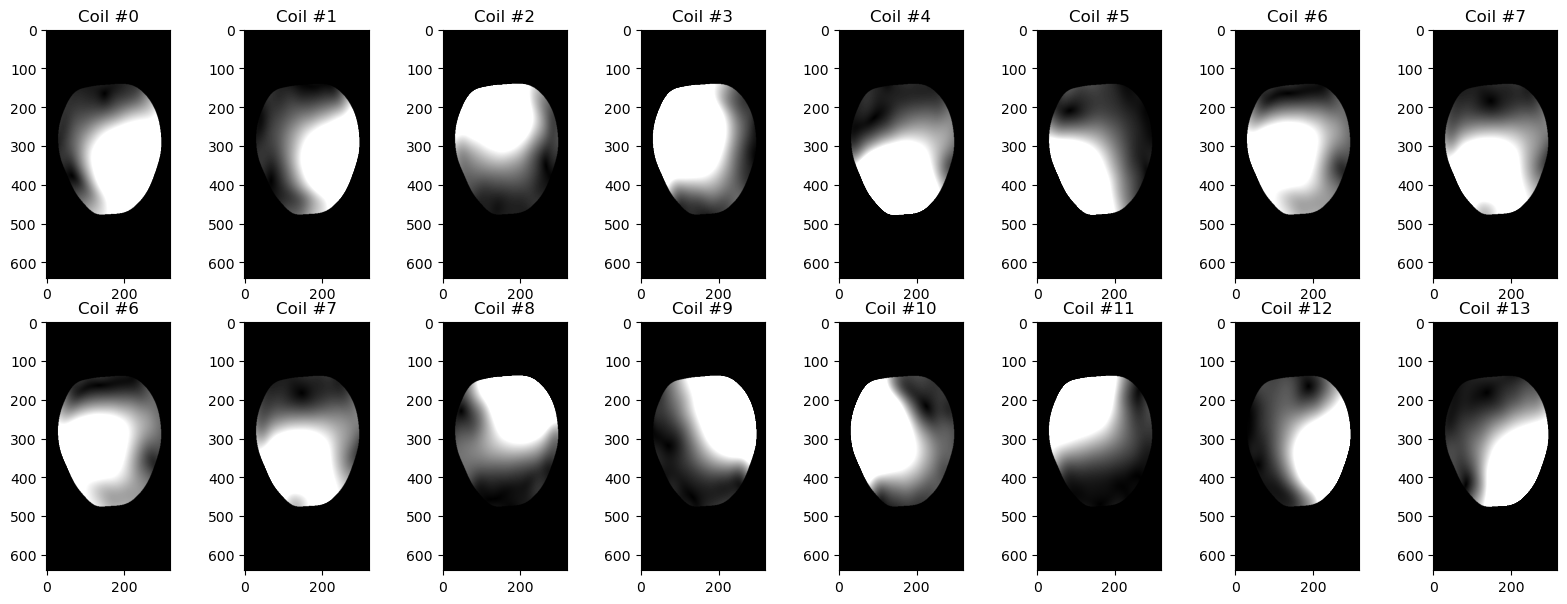

In [18]:
# visualize the ref scan coil images
fig, axes = plt.subplots(2, 8, figsize=(16, 6))
plt.tight_layout() # This automatically puts space between plots and make it tidy
for i in range(2):
    for ax, index in zip(axes[i], range(12)):
        ax.imshow(np.abs(test_data["maps"][0][i*6+index][:]),cmap='gray', vmax=0.2)
        ax.set_title('Coil #{}'.format(i*6 + index))

In [20]:
# visualize the ref scan coil images
cimg_und = bart(1,'fft -i -u 12', np.array(test_data["ksp"]))

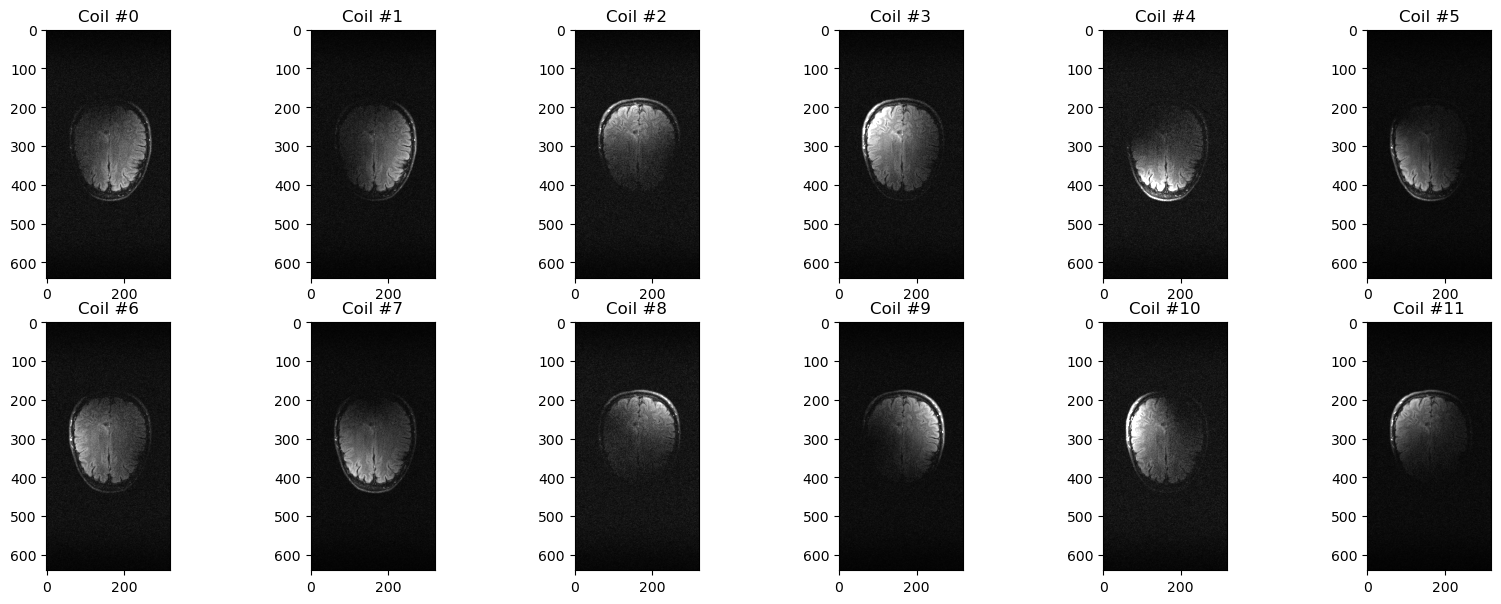

In [21]:
fig, axes = plt.subplots(2, 6, figsize=(16, 6))
plt.tight_layout() # This automatically puts space between plots and make it tidy
for i in range(2):
    for ax, index in zip(axes[i], range(12)):
        ax.imshow(np.abs(cimg_und[1][i*6+index][:][:]),cmap='gray',vmax=0.70)
        ax.set_title('Coil #{}'.format(i*6 + index))
plt.show()

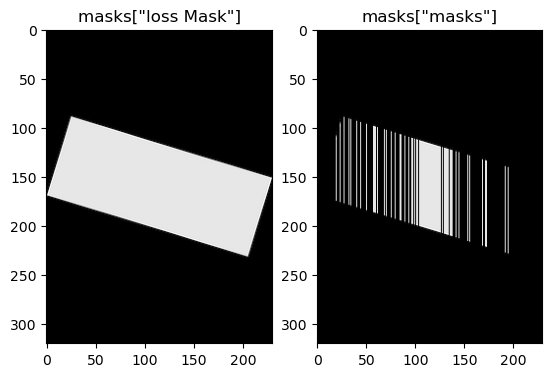

In [39]:
plt.subplot(1,2,1)
plt.title("masks[\"loss Mask\"]")
plt.imshow(np.array(masks["loss_masks"])[0], cmap="gray")

plt.subplot(1,2,2)
plt.title("masks[\"masks\"]")
plt.imshow(np.array(masks["masks"])[0], cmap="gray")